In [16]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn.metrics import accuracy_score

%matplotlib inline

In [24]:
import mysql.connector

db = mysql.connector.connect(
   host="localhost",
   user="root",
   passwd=""
)

print(db)

In [25]:
bank_df = pd.read_sql_query("SELECT * FROM bank_customer_prediction.bankcustomerprediction",db)

print(bank_df)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [26]:
bank_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Removing Unnecessary Columns

In [27]:
del bank_df['RowNumber']
del bank_df["CustomerId"]
del bank_df["Surname"]
del bank_df["Geography"]
del bank_df["Gender"]
bank_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


# Descriptive Statistics

In [28]:
bank_df.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.0,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.0,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.0,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.0,100090.24,57510.49,11.58,51002.11,100193.92,149388.25,199992.48
Exited,10000.0,0.20,0.40,0.00,0.00,0.00,0.00,1.00


In [29]:
bank_df.dtypes

CreditScore          int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# Data Visualization

Text(0.5, 1.0, 'Has Credit Card?')

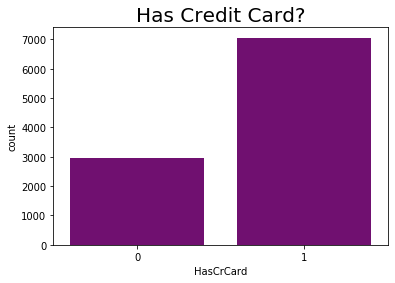

In [30]:
sns.countplot(data=bank_df, x='HasCrCard', color='purple')
plt.title('Has Credit Card?', fontsize = 20)

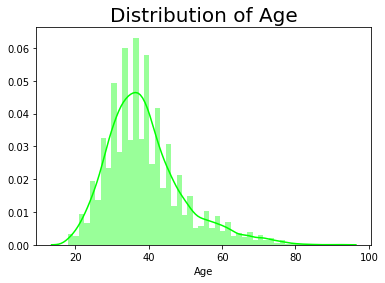

In [31]:
sns.distplot(bank_df['Age'], color= 'lime')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

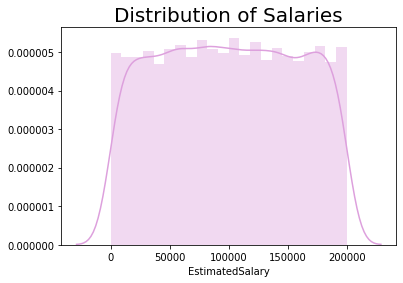

In [32]:
#Draw histogram Diagram
sns.distplot(bank_df['EstimatedSalary'], color= 'plum')
plt.title('Distribution of Salaries', fontsize = 20)
plt.show()

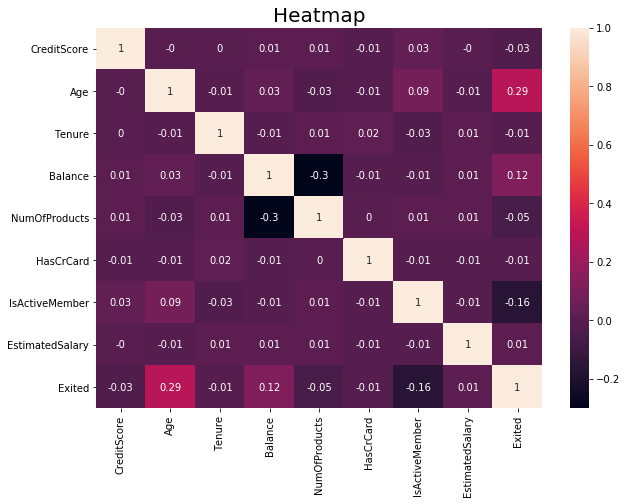

In [33]:
#Draw Heat and Map Diagram
plt.figure(figsize=(10,7))
sns.heatmap(bank_df.corr().round(2), annot = True)
plt.title('Heatmap', fontsize = 20)
plt.show()

In [34]:
#Draw Correlation Table
corr=bank_df.corr().round(2)
corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.00,-0.00,0.00,0.01,0.01,-0.01,0.03,-0.00,-0.03
Age,-0.00,1.00,-0.01,0.03,-0.03,-0.01,0.09,-0.01,0.29
Tenure,0.00,-0.01,1.00,-0.01,0.01,0.02,-0.03,0.01,-0.01
Balance,0.01,0.03,-0.01,1.00,-0.30,-0.01,-0.01,0.01,0.12
NumOfProducts,0.01,-0.03,0.01,-0.30,1.00,0.00,0.01,0.01,-0.05
HasCrCard,-0.01,-0.01,0.02,-0.01,0.00,1.00,-0.01,-0.01,-0.01
IsActiveMember,0.03,0.09,-0.03,-0.01,0.01,-0.01,1.00,-0.01,-0.16
EstimatedSalary,-0.00,-0.01,0.01,0.01,0.01,-0.01,-0.01,1.00,0.01
Exited,-0.03,0.29,-0.01,0.12,-0.05,-0.01,-0.16,0.01,1.00


In [35]:
corr["Exited"].sort_values(ascending=False)

Exited             1.00
Age                0.29
Balance            0.12
EstimatedSalary    0.01
HasCrCard         -0.01
Tenure            -0.01
CreditScore       -0.03
NumOfProducts     -0.05
IsActiveMember    -0.16
Name: Exited, dtype: float64

In [36]:
#Drop Columns
x=bank_df.drop(columns=['Exited'])
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [37]:
y=bank_df['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

# Data Partitation

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from dmba import classificationSummary, regressionSummary
from dmba import liftChart

In [39]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.40,random_state=0)

In [40]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((6000, 8), (4000, 8), (6000,), (4000,))

# Logistic Regression

In [41]:
# Below are the Standard Logistics Regression Function
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr1 = LogisticRegression(max_iter=1000).fit(X_train,Y_train)

In [42]:
score_lr1 = round(accuracy_score(lr1.predict(X_test),Y_test)*100,2)
score_lr1

78.15

In [43]:
#Find the accuracy of the model in percentage
print("Training model accuracy and confusion matrix")
classificationSummary(Y_train, lr1.predict(X_train))
print("Validation model accuracy and confusion matrix")
classificationSummary(Y_test, lr1.predict(X_test))
#print(classification_report(lr1.predict(X_test),Y_test))

Training model accuracy and confusion matrix
Confusion Matrix (Accuracy 0.7948)

       Prediction
Actual    0    1
     0 4684  107
     1 1124   85
Validation model accuracy and confusion matrix
Confusion Matrix (Accuracy 0.7815)

       Prediction
Actual    0    1
     0 3067  105
     1  769   59


# Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(X_train,Y_train)

In [45]:
score_nb = round(accuracy_score(nb.predict(X_test),Y_test)*100,2)
score_nb

77.88

In [46]:
#Find the accuracy of the model in percentage
print("Training model accuracy and confusion matrix")
classificationSummary(Y_train, nb.predict(X_train))
print("Validation model accuracy and confusion matrix")
classificationSummary(Y_test, nb.predict(X_test))
#print(classification_report(lr1.predict(X_test),Y_test))

Training model accuracy and confusion matrix
Confusion Matrix (Accuracy 0.7877)

       Prediction
Actual    0    1
     0 4627  164
     1 1110   99
Validation model accuracy and confusion matrix
Confusion Matrix (Accuracy 0.7788)

       Prediction
Actual    0    1
     0 3041  131
     1  754   74


# K Nearest Neighbors

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=19).fit(X_train,Y_train)

In [48]:
results = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, Y_train)
    results.append({
        'k': k,
        'accuracy': accuracy_score(knn.predict(X_test), Y_test)
    })
    
# Convert results to a pandas data frame
results = pd.DataFrame(results)
results

,k,accuracy
0,1,0.67750
1,3,0.73175
2,5,0.75625
3,7,0.76875
4,9,0.77525
5,11,0.78000
6,13,0.78500
7,15,0.78775
8,17,0.78825
9,19,0.79000


In [49]:
score_knn = round(accuracy_score(knn.predict(X_test),Y_test)*100,2)
score_knn

79.0

In [50]:
#Find the accuracy of the model in percentage
print("Training model accuracy and confusion matrix")
classificationSummary(Y_train, knn.predict(X_train))
print("Validation model accuracy and confusion matrix")
classificationSummary(Y_test, knn.predict(X_test))

Training model accuracy and confusion matrix
Confusion Matrix (Accuracy 0.8010)

       Prediction
Actual    0    1
     0 4784    7
     1 1187   22
Validation model accuracy and confusion matrix
Confusion Matrix (Accuracy 0.7900)

       Prediction
Actual    0    1
     0 3152   20
     1  820    8


# Classification Tree

In [51]:
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 5, random_state = 1234).fit(X_train,Y_train)

In [52]:
plt.rcParams.update({'figure.max_open_warning': 0})
score_dt = round(accuracy_score(dt.predict(X_test),Y_test)*100,2)
score_dt

85.8

In [53]:
#Find the accuracy of the model in percentage
print("Training model accuracy and confusion matrix")
classificationSummary(Y_train, dt.predict(X_train))
print("Validation model accuracy and confusion matrix")
classificationSummary(Y_test, dt.predict(X_test))

Training model accuracy and confusion matrix
Confusion Matrix (Accuracy 0.8560)

       Prediction
Actual    0    1
     0 4630  161
     1  703  506
Validation model accuracy and confusion matrix
Confusion Matrix (Accuracy 0.8580)

       Prediction
Actual    0    1
     0 3043  129
     1  439  389


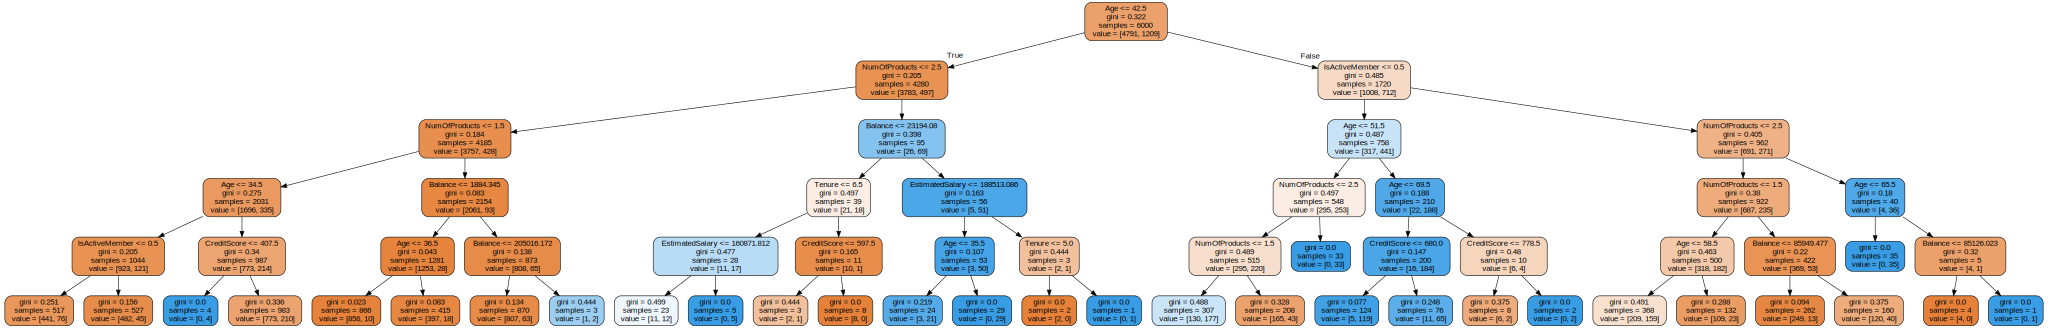

In [54]:
classification_tree= tree.export_graphviz(dt, out_file=None, filled=True, rounded=True, feature_names=X_train.columns)
graph=graphviz.Source(classification_tree)
graph

# Neural Network

In [55]:
from sklearn.neural_network import MLPClassifier, MLPRegressor

In [56]:
NNet = MLPClassifier(hidden_layer_sizes=(3,8), activation='logistic', solver='lbfgs', random_state=1, max_iter=10000).fit(X_train, Y_train.ravel())

In [57]:
score_NNet = round(accuracy_score(NNet.predict(X_test),Y_test)*100,2)
score_NNet

79.3

In [58]:
#Find the accuracy of the model in percentage
print("Training model accuracy and confusion matrix")
classificationSummary(Y_train, NNet.predict(X_train))
print("Validation model accuracy and confusion matrix")
classificationSummary(Y_test, NNet.predict(X_test))

Training model accuracy and confusion matrix
Confusion Matrix (Accuracy 0.7985)

       Prediction
Actual    0    1
     0 4791    0
     1 1209    0
Validation model accuracy and confusion matrix
Confusion Matrix (Accuracy 0.7930)

       Prediction
Actual    0    1
     0 3172    0
     1  828    0


# Descriminant Analysis

In [59]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
DA = LinearDiscriminantAnalysis().fit(X_train,Y_train)

In [60]:
score_DA = round(accuracy_score(DA.predict(X_test),Y_test)*100,2)
score_DA

79.62

In [61]:
print("Training model accuracy and confusion matrix")
classificationSummary(Y_train, DA.predict(X_train))
print("Validation model accuracy and confusion matrix")
classificationSummary(Y_test, DA.predict(X_test))

Training model accuracy and confusion matrix
Confusion Matrix (Accuracy 0.8028)

       Prediction
Actual    0    1
     0 4619  172
     1 1011  198
Validation model accuracy and confusion matrix
Confusion Matrix (Accuracy 0.7963)

       Prediction
Actual    0    1
     0 3035  137
     1  678  150


# Predict if the following bank customer would leave 

In [62]:
# new customer
newCustomer = pd.DataFrame([{'CreditScore': 700, 'Age': 30, 'Tenure': 5, 'Balance': 90000, 'NumOfProducts': 2, 'HasCrCard': 1, 'IsActiveMember': 1,
'EstimatedSalary': 75000}],
columns=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
'EstimatedSalary'])
newCustomer

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,700,30,5,90000,2,1,1,75000


# Choosing the Best Algorithm based on Accuracy

In [63]:
scores = [score_lr1,score_nb,score_knn,score_dt,score_NNet,score_DA]
algorithms = ["Logistic Regression","Naive Bayes","K-Nearest Neighbors","Decision Tree","Neural Network", "Linear Discriminant Analysis"]

In [64]:
scores

[78.15, 77.88, 79.0, 85.8, 79.3, 79.62]

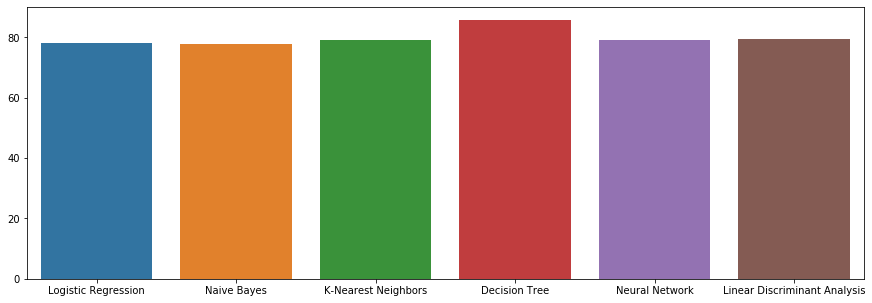

In [65]:
plt.figure(figsize=(15,5))
sns.barplot(x=algorithms,y=scores)
plt.show()

In [66]:
#Using multiple or a best method for predicting the future value

In [67]:
lr1.predict(newCustomer)

array([0], dtype=int64)

In [68]:
nb.predict(newCustomer)

array([0], dtype=int64)

In [69]:
knn.predict(newCustomer)

array([0], dtype=int64)

In [70]:
dt.predict(newCustomer)

array([0], dtype=int64)

In [71]:
NNet.predict(newCustomer)

array([0], dtype=int64)

In [72]:
DA.predict(newCustomer)

array([0], dtype=int64)

In [73]:
result = pd.DataFrame({
    'actual': Y_test,
    'Logistic regression': lr1.predict(X_test),
    'Naive-bayes': nb.predict(X_test),
    'k-nearest neighbor': knn.predict(X_test),
    'Classification tree': dt.predict(X_test),
    'Neural Network': NNet.predict(X_test),
    'Linear Discriminant Analysis': DA.predict(X_test),
    })
result.head(10)

,actual,Logistic regression,Naive-bayes,k-nearest neighbor,Classification tree,Neural Network,Linear Discriminant Analysis
9394,0,0,0,0,0,0,0
898,1,0,0,0,0,0,0
2398,0,0,0,0,0,0,0
5906,0,0,0,0,0,0,0
2343,0,0,0,0,0,0,0
8225,1,0,1,0,1,0,1
5506,0,0,0,0,0,0,0
6451,0,0,0,0,0,0,0
2670,1,0,0,0,0,0,0
3497,1,1,1,0,1,0,1


# Combining Methods: Ensembles and Uplift Modeling

In [74]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from dmba import liftChart
%matplotlib inline

In [75]:
#We will develop several models, then combine them in an ensemble. The models we will use are
#logistic regression,
#𝑘 -nearest neighbors with 𝑘=19 , and
#classification trees

In [76]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((6000, 8), (4000, 8), (6000,), (4000,))

In [77]:
# Logistic regression
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear').fit(X_train, Y_train)
classificationSummary(Y_train, logit_reg.predict(X_train))
classificationSummary(Y_test, logit_reg.predict(X_test))

Confusion Matrix (Accuracy 0.7948)

       Prediction
Actual    0    1
     0 4708   83
     1 1148   61
Confusion Matrix (Accuracy 0.7850)

       Prediction
Actual    0    1
     0 3094   78
     1  782   46


In [78]:
# k-nearest neighbors
knn = KNeighborsClassifier(n_neighbors=19).fit(X_train, Y_train)
classificationSummary(Y_train, knn.predict(X_train))
classificationSummary(Y_test, knn.predict(X_test))

Confusion Matrix (Accuracy 0.8010)

       Prediction
Actual    0    1
     0 4784    7
     1 1187   22
Confusion Matrix (Accuracy 0.7900)

       Prediction
Actual    0    1
     0 3152   20
     1  820    8


Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 4791    0
     1    0 1209
Confusion Matrix (Accuracy 0.7730)

       Prediction
Actual    0    1
     0 2671  501
     1  407  421


[Text(222.09152100362834, 213.41333333333333, 'X[1] <= 42.5\ngini = 0.322\nsamples = 6000\nvalue = [4791, 1209]'),
 Text(160.04716810722329, 205.36, 'X[4] <= 2.5\ngini = 0.205\nsamples = 4280\nvalue = [3783, 497]'),
 Text(119.36513444615899, 197.30666666666667, 'X[4] <= 1.5\ngini = 0.184\nsamples = 4185\nvalue = [3757, 428]'),
 Text(72.0737879514555, 189.25333333333333, 'X[1] <= 34.5\ngini = 0.275\nsamples = 2031\nvalue = [1696, 335]'),
 Text(35.20327122779214, 181.2, 'X[6] <= 0.5\ngini = 0.205\nsamples = 1044\nvalue = [923, 121]'),
 Text(12.778579322712487, 173.14666666666668, 'X[3] <= 207414.641\ngini = 0.251\nsamples = 517\nvalue = [441, 76]'),
 Text(12.33176974726833, 165.09333333333333, 'X[7] <= 199572.898\ngini = 0.248\nsamples = 516\nvalue = [441, 75]'),
 Text(11.884960171824172, 157.04, 'X[2] <= 4.5\ngini = 0.246\nsamples = 515\nvalue = [441, 74]'),
 Text(2.7367086495954625, 148.98666666666668, 'X[0] <= 424.5\ngini = 0.191\nsamples = 234\nvalue = [209, 25]'),
 Text(2.2898990741

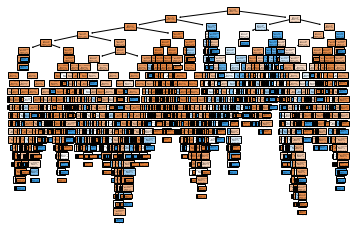

In [79]:
# classification tree
classtree = DecisionTreeClassifier().fit(X_train,Y_train)
classificationSummary(Y_train, classtree.predict(X_train))
classificationSummary(Y_test, classtree.predict(X_test))
plot_tree(classtree, filled=True)
#tree.plot_tree(classtree)

In [80]:
# Naive-Bayes
nba = GaussianNB().fit(X_train,Y_train)
classificationSummary(Y_train, nba.predict(X_train))
classificationSummary(Y_test, nba.predict(X_test))

Confusion Matrix (Accuracy 0.7877)

       Prediction
Actual    0    1
     0 4627  164
     1 1110   99
Confusion Matrix (Accuracy 0.7788)

       Prediction
Actual    0    1
     0 3041  131
     1  754   74


In [81]:
## Solution
##Create a data frame with the actual outcome, predicted outcome, and each of the models.
##Report the first 10 rows of this data frame.

In [79]:
result = pd.DataFrame({
    'actual': Y_test,
    'Logistic regression': logit_reg.predict(X_test),
    'k-nearest neighbor': knn.predict(X_test),
    'classification tree': classtree.predict(X_test),
    'naive-bayes': nba.predict(X_test),
})
result.head(10)

,actual,Logistic regression,k-nearest neighbor,classification tree,naive-bayes
9394,0,0,0,0,0
898,1,0,0,1,0
2398,0,0,0,0,0
5906,0,0,0,0,0
2343,0,0,0,0,0
8225,1,0,0,1,1
5506,0,0,0,0,0
6451,0,0,0,0,0
2670,1,0,0,0,0
3497,1,1,0,1,1
